In [27]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

distance = []
energy_dif = []

folder = 'results'
files = os.listdir(folder)
files_csv = [file for file in files if file.endswith('.csv')]

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('_')[0])
    return numero

files_csv = sorted(files_csv, key=ordenar_por_numero)

for index, archivo_csv in enumerate(files_csv):

    distance.append([])
    energy_dif.append([])

    with open(os.path.join(folder, archivo_csv), 'r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            distance[index].append(float(row[0]))
            energy_dif[index].append(float(row[1]) - float(row[2]))

files_names = [file.split('.')[0] for file in files_csv]

In [28]:
files_names

['16_shots', '128_shots', '1024_shots', '16384_shots']

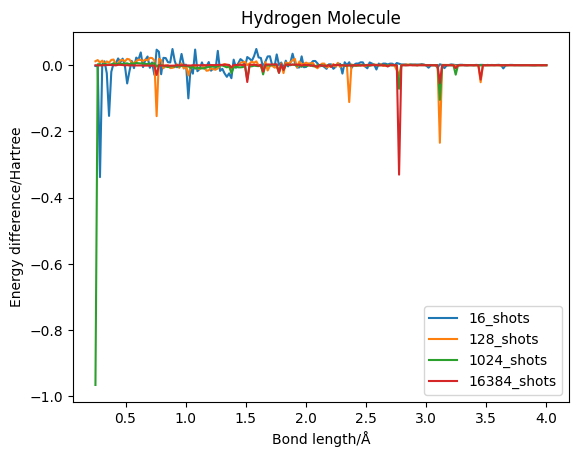

In [29]:
for index, file in enumerate(files_names):
    plt.plot(distance[index], energy_dif[index], marker='', linestyle='-', label=file)
    plt.xlabel('Bond length/Å')
    plt.ylabel('Energy difference/Hartree')
    plt.title('Hydrogen Molecule')
    plt.legend()

plt.show()

In [32]:
np.max(energy_dif[1])

0.022350213757456938

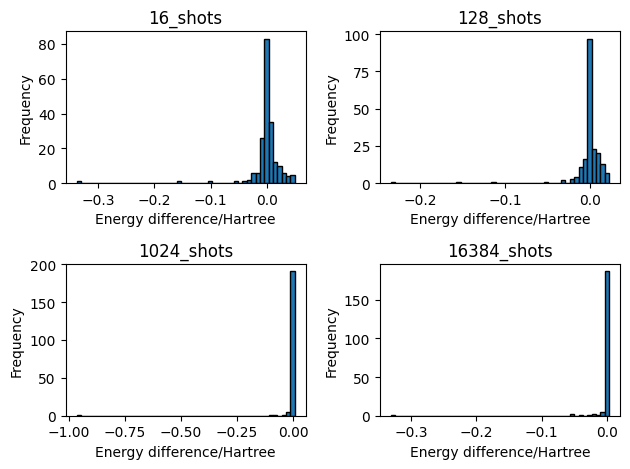

In [33]:
fig, axs = plt.subplots(2, 2)

for index, ax in enumerate(axs.flat):
    min_value = np.min(energy_dif[index])
    max_value = np.max(energy_dif[index])
    num_bins = 50
    bins = np.linspace(min_value, max_value, num_bins + 1)
    
    ax.hist(energy_dif[index], bins=bins, edgecolor='black')
    ax.set_title(files_names[index])
    ax.set_xlabel('Energy difference/Hartree')
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()
